$$\textbf{EC-422 Artificial Intelliegnce - Project}$$

Objective:

Using the dataset of training and testing molecules, predict the inhibitory nature of the molecule against STAT3.

$$\text{Import necessary libraries}$$

We use various libraries such as matplotlib, seaborn for plotting, numpy for numerical calculations, pandas for reading and describing the dataset, sklearn for normalization, standardization and implementing various models such as logisitic regression and Naive-Bayes classification and tensorflow for training various types of neural networks.

In [1]:
try:
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from sklearn import metrics
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping

except ImportError as e:
    print("Error occurred ", e)
    print("Please install the required libraries")

$$\textbf{Learning about the dataset}$$

In [2]:
training_data = pd.read_csv("train.csv")

testing_data = pd.read_csv("test.csv")

In [3]:
print("Shape of training_data is: ", training_data.shape)

print("Shape of testing_data is: ", testing_data.shape)

Shape of training_data is:  (2589, 210)
Shape of testing_data is:  (647, 210)


In [4]:
columns = training_data.columns
print("Columns in training_data are: ", training_data.columns)
print("-"*100)
print("Columns in testing_data are: ", testing_data.columns)

Columns in training_data are:  Index(['Inhibitor', 'SMILES', 'MaxEStateIndex', 'MinEStateIndex',
       'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt',
       'HeavyAtomMolWt', 'ExactMolWt',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=210)
----------------------------------------------------------------------------------------------------
Columns in testing_data are:  Index(['Inhibitor', 'SMILES', 'MaxEStateIndex', 'MinEStateIndex',
       'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt',
       'HeavyAtomMolWt', 'ExactMolWt',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=210)


In [5]:
print("The first 5 rows of training_data are:\n", training_data.head())

The first 5 rows of training_data are:
    Inhibitor                                        SMILES  MaxEStateIndex  \
0          0       O=C(Nc1ccc(S(=O)(=O)N2CCCC2)cc1)c1cccs1       12.394955   
1          1   CC(=O)Nc1ccccc1OCC(=O)c1cc(C)n(Cc2cccs2)c1C       12.717250   
2          1           CC(C)C(=O)Nc1ccc(-c2nc3cccnc3o2)cc1       11.634335   
3          1             Cc1ccc(-c2cc(C(=O)N3CCCC3)no2)cc1       12.149138   
4          0  C(=C\c1nccc2c1[nH]c1ccccc12)\c1ccc2c(c1)OCO2        5.423368   

   MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex       qed    MolWt  \
0       -3.404453          12.394955           0.189676  0.933439  336.438   
1       -0.185649          12.717250           0.083439  0.614894  382.485   
2       -0.048342          11.634335           0.005730  0.797617  281.315   
3       -0.028137          12.149138           0.028137  0.829611  256.305   
4        0.290108           5.423368           0.290108  0.587278  314.344   

   HeavyAtomMolWt  Exa

In [6]:
print("First 5 rows of testing data are:\n", testing_data.head())

First 5 rows of testing data are:
    Inhibitor                                             SMILES  \
0          0  CC(C)c1cccc(C(C)C)c1NC(=O)c1ccc(OCC(=O)NCc2ccc...   
1          0             O=C(CSc1ncnc2ccccc12)Nc1ccc2c(c1)OCCO2   
2          0         CC1CCN(C(=O)Cn2cc(C(=O)C3CC3)c3ccccc32)CC1   
3          0            Cn1c(CSCc2ccc(F)cc2)nnc1SCC(=O)Nc1nccs1   
4          1                      COc1cccc(COc2cc3ccccc3nc2C)c1   

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       12.944986       -0.201685          12.944986           0.085428   
1       12.242526       -0.107064          12.242526           0.107064   
2       12.663361        0.160254          12.663361           0.160254   
3       12.902311       -0.229061          12.902311           0.124829   
4        5.912382        0.498076           5.912382           0.498076   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  ...  fr_sulfide  \
0  0.432972  444.575         412.319  444.

In [7]:
training_data.describe()

,Inhibitor,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,...,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.0,2589.000000,2589.000000,2589.000000
mean,0.483584,11.390717,-0.806500,11.390717,0.191563,0.662188,340.214040,322.429011,339.817284,123.657783,...,0.137505,0.108536,0.014677,0.001545,0.016995,0.095404,0.0,0.097335,0.058324,0.036694
std,0.499827,2.496255,1.435521,2.496255,0.205662,0.161564,72.317206,68.881983,72.210855,26.607549,...,0.357654,0.328044,0.126543,0.039284,0.135123,0.297747,0.0,0.307977,0.312165,0.192111
min,0.000000,2.305620,-7.414247,2.305620,0.000105,0.154773,139.154000,130.082000,139.063329,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,11.630052,-0.782637,11.630052,0.051785,0.545719,282.339000,268.187000,282.111676,102.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,12.239986,-0.345503,12.239986,0.126812,0.680020,330.343000,313.659000,330.013284,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,12.719923,-0.071080,12.719923,0.240900,0.787986,393.470000,372.342000,393.088019,142.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,15.309191,1.066901,15.309191,1.066901,0.947906,596.171000,561.899000,595.157755,220.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.0,3.000000,5.000000,2.000000


In [8]:
testing_data.describe()

,Inhibitor,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,...,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.0,647.000000,647.000000,647.000000
mean,0.483771,11.482577,-0.852900,11.482577,0.187370,0.649579,351.174337,332.555159,350.770018,127.774343,...,0.143740,0.137558,0.020093,0.004637,0.018547,0.091190,0.0,0.091190,0.092736,0.037094
std,0.500123,2.469214,1.442624,2.469214,0.203390,0.162340,74.403412,70.396663,74.296879,27.659223,...,0.364084,0.382992,0.140426,0.067988,0.146039,0.293426,0.0,0.313819,0.482569,0.197154
min,0.000000,4.215115,-6.048641,4.215115,0.000621,0.140164,193.227000,184.157000,193.019749,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,11.691538,-0.757606,11.691538,0.051110,0.534723,292.264500,276.214000,291.608630,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,12.329691,-0.352966,12.329691,0.116505,0.672086,343.177000,324.280000,342.157957,126.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,12.826883,-0.103025,12.826883,0.230309,0.768822,404.469500,382.290000,404.117452,146.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,14.843433,0.991829,14.843433,0.991829,0.942961,586.675000,559.907000,586.298927,234.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.0,3.000000,6.000000,2.000000


In [9]:
y_train = training_data["Inhibitor"]

y_test = testing_data["Inhibitor"]

In [10]:
print("Shape of y_test is: ", y_test.shape)

print("Some instances of y_test are:\n", y_test[0:10])

Shape of y_test is:  (647,)
Some instances of y_test are:
 0    0
1    0
2    0
3    0
4    1
5    0
6    1
7    1
8    0
9    1
Name: Inhibitor, dtype: int64


In [11]:
print("Number of positive instances in y_test are:", y_test[y_test == 1].shape[0])

print("Number of negative instances in y_test are:", y_test[y_test == 0].shape[0])

Number of positive instances in y_test are: 313
Number of negative instances in y_test are: 334


In [12]:
print("Shape of y_train is: ", y_train.shape)

print("Some instances of y_train are:\n", y_train[0:10])

Shape of y_train is:  (2589,)
Some instances of y_train are:
 0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: Inhibitor, dtype: int64


In [13]:
print("Number of positive instances in y_train are:", y_train[y_train == 1].shape[0])

print("Number of negative instances in y_train are:", y_train[y_train == 0].shape[0])

Number of positive instances in y_train are: 1252
Number of negative instances in y_train are: 1337


In [14]:
X_train = training_data.drop(["Inhibitor","SMILES",], axis=1)

X_test = testing_data.drop(["Inhibitor","SMILES",], axis=1)

$$\textbf{Data Engineering}$$

We remove constant features, normalize, standardize the data in this part.

In [15]:
# Removing constant features

for i in X_train.columns:
    val = training_data[i][0]
    if X_train[X_train[i] == val].shape[0] == X_train.shape[0]:
        X_train.drop(i, axis=1, inplace=True)
        X_test.drop(i, axis=1, inplace=True)

In [16]:
columns = X_train.columns

In [17]:
#X_train.hist(figsize=(100,100))

In [18]:
print("Shape of X_train is: ", X_train.shape)
print("Shape of X_test is: ", X_test.shape)

Shape of X_train is:  (2589, 193)
Shape of X_test is:  (647, 193)


In [19]:
print(X_train.head(2))

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       12.394955       -3.404453          12.394955           0.189676   
1       12.717250       -0.185649          12.717250           0.083439   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.933439  336.438         320.310  336.060234                  116   
1  0.614894  382.485         360.309  382.135114                  140   

   MaxPartialCharge  ...  fr_pyridine  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0          0.265223  ...            0           0             1           0   
1          0.220850  ...            0           0             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiophene  \
0                  0             0            0             1   
1                  0             0            0             1   

   fr_unbrch_alkane  fr_urea  
0                 0        0  
1                 0        0  

[2 rows x 193 columns]


In [20]:
print(X_test.head(2))

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       12.944986       -0.201685          12.944986           0.085428   
1       12.242526       -0.107064          12.242526           0.107064   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.432972  444.575         412.319  444.241293                  172   
1  0.573778  353.403         338.283  353.083412                  126   

   MaxPartialCharge  ...  fr_pyridine  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0          0.257705  ...            0           0             0           0   
1          0.234296  ...            0           1             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiophene  \
0                  0             0            0             0   
1                  0             0            0             0   

   fr_unbrch_alkane  fr_urea  
0                 0        0  
1                 0        0  

[2 rows x 193 columns]


<h3>Normalization</h3>

The data becomes, 
$$X_{\text{new}} = \frac{X - X_{\text{min}}}{X_{\text{max}}-X_{\text{min}}}$$

In [21]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)


X_test = scaler.transform(X_test)

<h3>Standardization</h3>

The data becomes, $$X_{\text{new}} = \frac{X - \mu}{\sigma}$$

where $\mu$ is mean and $\sigma$ is standard deviation.

In [22]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

<p>Now that we have calculated our normalized and standardized data, we can now find the correlation matrix of the features of the training data.</p>

In [23]:
correlationMatrix = training_data.corr()

C:\Users\jayad\AppData\Local\Temp\ipykernel_4952\2764691630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = training_data.corr()


In [24]:
X_train = pd.DataFrame(X_train, columns=columns)

correlationMatrix = X_train.corr()

X_train = X_train.to_numpy()

In [25]:
print(correlationMatrix)

                   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  \
MaxEStateIndex           1.000000       -0.448502           1.000000   
MinEStateIndex          -0.448502        1.000000          -0.448502   
MaxAbsEStateIndex        1.000000       -0.448502           1.000000   
MinAbsEStateIndex       -0.774488        0.346392          -0.774488   
qed                     -0.088241        0.041474          -0.088241   
...                           ...             ...                ...   
fr_tetrazole            -0.034654        0.050082          -0.034654   
fr_thiazole             -0.009944        0.001168          -0.009944   
fr_thiophene            -0.037594        0.059502          -0.037594   
fr_unbrch_alkane        -0.014491        0.010768          -0.014491   
fr_urea                  0.078763       -0.023191           0.078763   

                   MinAbsEStateIndex       qed     MolWt  HeavyAtomMolWt  \
MaxEStateIndex             -0.774488 -0.088241  0.410506   

In [26]:
#sns.heatmap(correlationMatrix, annot=True)

$$\textbf{MODEL IMPLEMENTATIONS}$$

We are implementing 4 models on the dataset. They are:

1. Logistic Regression
2. Naive-Bayes Classification
3. Deep Neural Network
4. SVM

~~5. Convolutional Neural Network~~

## 1. LOGISTIC REGRESSION

In [27]:
logistic = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=4000) 

logistic.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [28]:
predictions = logistic.predict(X_test)

print(predictions[0:10])

[1 1 1 0 1 0 1 0 0 0]


In [29]:
accuracy = metrics.accuracy_score(y_test, predictions)

print("Accuracy of Logistic Regression is: ", accuracy)

Accuracy of Logistic Regression is:  0.740340030911901


In [30]:
precision = metrics.precision_score(y_test, predictions)

print("Precision of Logistic Regression is: ", precision)

Precision of Logistic Regression is:  0.7331189710610932


In [31]:
recall = metrics.recall_score(y_test, predictions)

print("Recall of Logistic Regression is: ", recall)

Recall of Logistic Regression is:  0.7284345047923323


In [32]:
auc_score = metrics.roc_auc_score(y_test, predictions)

print("AUC score of Logistic Regression is: ", auc_score)

AUC score of Logistic Regression is:  0.7399657553901782


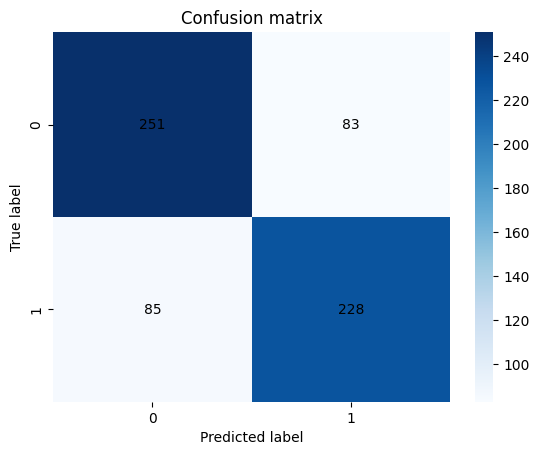

In [33]:
confusionMatrixLR = metrics.confusion_matrix(y_test, predictions)

sns.heatmap(confusionMatrixLR, annot=True, cmap="Blues", fmt="d", annot_kws={"color": "black"})
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 2. Naive-Bayes Classifier

~~(Should fix, there is some error I guess)~~

Shouldn't use it at all for numerical data.

In [34]:
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

GaussianNB()

In [35]:
predictions = gaussian.predict(X_test)

In [36]:
print(predictions[0:10])

[1 1 1 1 1 1 1 1 1 1]


In [37]:
accuracy = metrics.accuracy_score(y_test, predictions)

print("Accuracy of Naive Bayes is: ", accuracy)

Accuracy of Naive Bayes is:  0.517774343122102


In [38]:
precision = metrics.precision_score(y_test, predictions)

print("Precision of Naive Bayes is: ", precision)

Precision of Naive Bayes is:  0.5008183306055647


In [39]:
recall = metrics.recall_score(y_test, predictions)

print("Recall of Naive Bayes is: ", recall)

Recall of Naive Bayes is:  0.9776357827476039


In [40]:
auc_score = metrics.roc_auc_score(y_test, predictions)

print("AUC score of Naive Bayes is: ", auc_score)

AUC score of Naive Bayes is:  0.5322310650264965


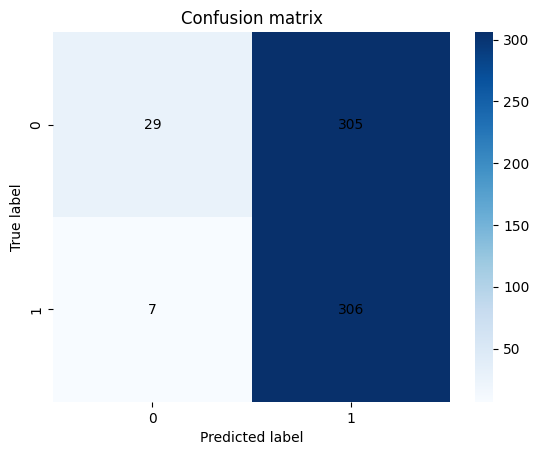

In [41]:
confusionMatrixNB = metrics.confusion_matrix(y_test, predictions)

sns.heatmap(confusionMatrixNB, annot=True, cmap="Blues", fmt="d", annot_kws={"color": "black"})
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 3. Deep Neural Network

(Try different architectures of NN later to increase accuracy)

In [42]:
# Here we split the training data into training and validation data

neuralTrainX, neuralValX, neuralTrainY, neuralValY = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

print("Shape of neuralTrainX is: ", neuralTrainX.shape)
print("Shape of neuralTrainY is: ", neuralTrainY.shape)
print("Shape of neuralValX is: ", neuralValX.shape)
print("Shape of neuralValY is: ", neuralValY.shape)

Shape of neuralTrainX is:  (2071, 193)
Shape of neuralTrainY is:  (2071,)
Shape of neuralValX is:  (518, 193)
Shape of neuralValY is:  (518,)


In [43]:
neuralNetwork = Sequential()
neuralNetwork.add(Dense(64, activation="relu", input_shape=(neuralTrainX.shape[1],)))
neuralNetwork.add(Dropout(0.2))
neuralNetwork.add(Dense(32, activation="relu"))
neuralNetwork.add(Dropout(0.2))
neuralNetwork.add(Dense(1, activation="sigmoid"))

In [44]:
neuralNetwork.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [46]:
history = neuralNetwork.fit(neuralTrainX, neuralTrainY, 
                            epochs=100, 
                            batch_size=32, 
                            validation_data=(neuralValX, neuralValY), 
                            callbacks=[early_stop])

Epoch 1/100
65/65 [==============================] - 1s 6ms/step - loss: 0.7017 - accuracy: 0.5939 - val_loss: 0.6026 - val_accuracy: 0.6757
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.6721 - val_loss: 0.5698 - val_accuracy: 0.7124
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.6944 - val_loss: 0.5622 - val_accuracy: 0.6950
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7243 - val_loss: 0.5515 - val_accuracy: 0.7066
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7407 - val_loss: 0.5507 - val_accuracy: 0.7046
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7605 - val_loss: 0.5624 - val_accuracy: 0.7027
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7586 - val_loss: 0.5536 - val_accuracy: 0.7124
Epoch 8/100
6

In [47]:
predictionsNN = neuralNetwork.predict(X_test).flatten()
predictions = []
for i in predictionsNN:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

print(predictions[0:10])

21/21 [==============================] - 0s 782us/step
[0, 0, 0, 0, 0, 0, 1, 0, 1, 1]


In [48]:
accuracy = metrics.accuracy_score(y_test, predictions)

print("Accuracy of Neural Network is: ", accuracy)

Accuracy of Neural Network is:  0.7465224111282844


In [49]:
precision = metrics.precision_score(y_test, predictions)

print("Precision of Neural Network is: ", precision)

Precision of Neural Network is:  0.7395498392282959


In [50]:
recall = metrics.recall_score(y_test, predictions)

print("Recall of Neural Network is: ", recall)

Recall of Neural Network is:  0.7348242811501597


In [51]:
f1_score = metrics.f1_score(y_test, predictions)

print("F1 score of Neural Network is: ", f1_score)

F1 score of Neural Network is:  0.7371794871794872


In [52]:
auc_score = metrics.roc_auc_score(y_test, predictions)

print("AUC score of Neural Network is: ", auc_score)

AUC score of Neural Network is:  0.7461546555451398


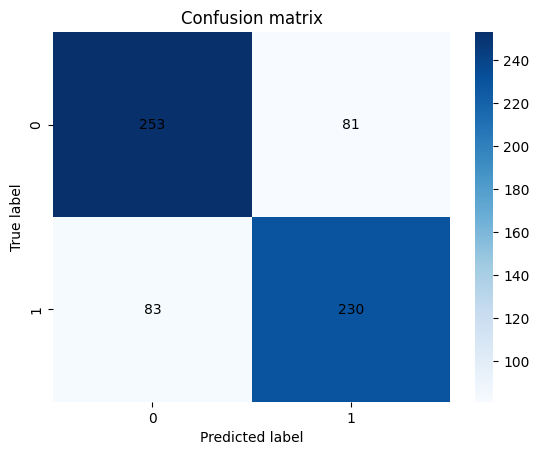

In [53]:
cm = metrics.confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"color": "black"})
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [54]:
neuralNetwork.save("neuralNetwork.h5")

## 4. Support Vector Classifier

In [55]:
supportVector = SVC(kernel="linear", C=1.0, probability=True)

supportVector.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [56]:
predictionsSVM = supportVector.predict(X_test)

In [57]:
print(predictionsSVM[0:10])

[1 1 1 0 1 0 1 0 0 0]


In [58]:
accuracySVM = metrics.accuracy_score(y_test, predictionsSVM)

print("Accuracy of SVM is: ", accuracySVM)

Accuracy of SVM is:  0.7372488408037094


In [59]:
precisionSVM = metrics.precision_score(y_test, predictionsSVM)

print("Precision of SVM is: ", precisionSVM)

Precision of SVM is:  0.7344262295081967


In [60]:
recallSVM = metrics.recall_score(y_test, predictionsSVM)

print("Recall of SVM is: ", recallSVM)

Recall of SVM is:  0.7156549520766773


In [61]:
f1_scoreSVM = metrics.f1_score(y_test, predictionsSVM)

print("F1 score of SVM is: ", f1_scoreSVM)

F1 score of SVM is:  0.7249190938511326


In [62]:
auc_scoreSVM = metrics.roc_auc_score(y_test, predictionsSVM)

print("AUC score of SVM is: ", auc_scoreSVM)

AUC score of SVM is:  0.7365699910083985


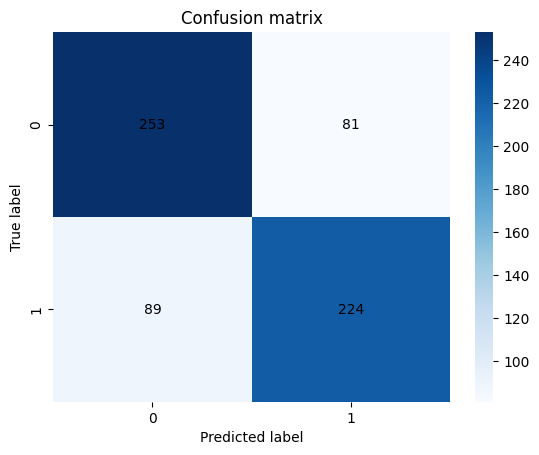

In [63]:
confusionMatrixSVM = metrics.confusion_matrix(y_test, predictionsSVM)

sns.heatmap(confusionMatrixSVM, annot=True, cmap="Blues", fmt="d", annot_kws={"color": "black"})
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()